In [1]:
import pandas as pd

#read in files
crime2011 = pd.read_csv("data/timagesopendataarchivescsvmonthlycrime2011.csv", ",")
crime2012 = pd.read_csv("data/timagesopendataarchivescsvmonthlycrime2012.csv", ",")
crime2013 = pd.read_csv("data/timagesopendataarchivescsvmonthlycrime2013.csv", ",")

crime2014 = pd.read_csv("data/timagesopendataarchivescsvnevercrime2014.csv", ",")
crime2015 = pd.read_csv("data/timagesopendataarchivescsvnevercrime2015.csv", ",")

crime2016 = pd.read_csv("data/timagesopendataarchivescsvmonthlycrime2016.csv", ",")
crime2017 = pd.read_csv("data/timagesopendataarchivescsvmonthlycrime2017.csv", ",")

In [2]:
crime2013.head()

,INCIDENT_TYPE,HUNDRED_BLOCK,MONTH,YEAR
0,Break and Enter - Business,2200 152ND ST,1,2013
1,Break and Enter - Business,12500 82ND AVE,1,2013
2,Break and Enter - Business,13500 77TH AVE,1,2013
3,Break and Enter - Business,15300 56TH AVE,1,2013
4,Break and Enter - Business,2300 152ND ST,1,2013


In [3]:
#fix the dataset that is a bit different
crime2014["HUNDRED_BLOCK"] = crime2014["HUNDRED_BLOCK"] + " " + crime2014["ROAD_NAME"]
crime2014 = crime2014.drop('ROAD_NAME', 1)

In [6]:
#see the different incident types, same across years. exclude 'Fatal/Injury Collision'
crime2011['INCIDENT_TYPE'].unique()

array(['Break and Enter - Business', 'Break and Enter - Residence',
       'Fatal/Injury Collision', 'Shoplifting', 'Theft from Motor Vehicle',
       'Theft of Motor Vehicle'], dtype=object)

In [7]:
#group the datasets by the location, and count the number of occurences of incidents (for each type)   , reset index beacuse, for every year, i perform a outer join HUNDREDREC_BLOCK to merge the datasets

#2011
crime2011_grouped_by_BaEB = crime2011[crime2011['INCIDENT_TYPE'] == 'Break and Enter - Business' ] .groupby(['HUNDRED_BLOCK', 'YEAR', 'MONTH'])['INCIDENT_TYPE'].size().to_frame('Break and Enter - Business').reset_index()
crime2011_grouped_by_BaER = crime2011[crime2011['INCIDENT_TYPE'] == 'Break and Enter - Residence' ] .groupby(['HUNDRED_BLOCK', 'YEAR', 'MONTH'])['INCIDENT_TYPE'].size().to_frame('Break and Enter - Residence').reset_index()
crime2011_grouped_by_shoplifting = crime2011[crime2011['INCIDENT_TYPE'] == 'Shoplifting' ] .groupby(['HUNDRED_BLOCK', 'YEAR', 'MONTH'])['INCIDENT_TYPE'].size().to_frame('Shoplifting').reset_index()
crime2011_grouped_by_TfMV = crime2011[crime2011['INCIDENT_TYPE'] == 'Theft from Motor Vehicle' ] .groupby(['HUNDRED_BLOCK', 'YEAR', 'MONTH'])['INCIDENT_TYPE'].size().to_frame('Theft from Motor Vehicle').reset_index()
crime2011_grouped_by_ToMV = crime2011[crime2011['INCIDENT_TYPE'] == 'Theft of Motor Vehicle' ] .groupby(['HUNDRED_BLOCK', 'YEAR', 'MONTH'])['INCIDENT_TYPE'].size().to_frame('Theft of Motor Vehicle').reset_index()

crime2011_grouped_by_incident_type_merged = crime2011_grouped_by_BaEB.merge(crime2011_grouped_by_BaER, on=["HUNDRED_BLOCK", "YEAR", "MONTH"], how='outer').merge(crime2011_grouped_by_shoplifting, on=["HUNDRED_BLOCK", "YEAR", "MONTH"], how='outer').merge(crime2011_grouped_by_TfMV, on=["HUNDRED_BLOCK", "YEAR", "MONTH"], how='outer').merge(crime2011_grouped_by_ToMV, on=["HUNDRED_BLOCK", "YEAR", "MONTH"], how='outer')

#2012
crime2012_grouped_by_BaEB = crime2012[crime2012['INCIDENT_TYPE'] == 'Break and Enter - Business' ] .groupby(['HUNDRED_BLOCK', 'YEAR', 'MONTH'])['INCIDENT_TYPE'].size().to_frame('Break and Enter - Business').reset_index()
crime2012_grouped_by_BaER = crime2012[crime2012['INCIDENT_TYPE'] == 'Break and Enter - Residence' ] .groupby(['HUNDRED_BLOCK', 'YEAR', 'MONTH'])['INCIDENT_TYPE'].size().to_frame('Break and Enter - Residence').reset_index()
crime2012_grouped_by_shoplifting = crime2012[crime2012['INCIDENT_TYPE'] == 'Shoplifting' ] .groupby(['HUNDRED_BLOCK', 'YEAR', 'MONTH'])['INCIDENT_TYPE'].size().to_frame('Shoplifting').reset_index()
crime2012_grouped_by_TfMV = crime2012[crime2012['INCIDENT_TYPE'] == 'Theft from Motor Vehicle' ] .groupby(['HUNDRED_BLOCK', 'YEAR', 'MONTH'])['INCIDENT_TYPE'].size().to_frame('Theft from Motor Vehicle').reset_index()
crime2012_grouped_by_ToMV = crime2012[crime2012['INCIDENT_TYPE'] == 'Theft of Motor Vehicle' ] .groupby(['HUNDRED_BLOCK', 'YEAR', 'MONTH'])['INCIDENT_TYPE'].size().to_frame('Theft of Motor Vehicle').reset_index()

crime2012_grouped_by_incident_type_merged = crime2012_grouped_by_BaEB.merge(crime2012_grouped_by_BaER, on=["HUNDRED_BLOCK", "YEAR", "MONTH"], how='outer').merge(crime2012_grouped_by_shoplifting, on=["HUNDRED_BLOCK", "YEAR", "MONTH"], how='outer').merge(crime2012_grouped_by_TfMV, on=["HUNDRED_BLOCK", "YEAR", "MONTH"], how='outer').merge(crime2012_grouped_by_ToMV, on=["HUNDRED_BLOCK", "YEAR", "MONTH"], how='outer')

#2013
crime2013_grouped_by_BaEB = crime2013[crime2013['INCIDENT_TYPE'] == 'Break and Enter - Business' ] .groupby(['HUNDRED_BLOCK', 'YEAR', 'MONTH'])['INCIDENT_TYPE'].size().to_frame('Break and Enter - Business').reset_index()
crime2013_grouped_by_BaER = crime2013[crime2013['INCIDENT_TYPE'] == 'Break and Enter - Residence' ] .groupby(['HUNDRED_BLOCK', 'YEAR', 'MONTH'])['INCIDENT_TYPE'].size().to_frame('Break and Enter - Residence').reset_index()
crime2013_grouped_by_shoplifting = crime2013[crime2013['INCIDENT_TYPE'] == 'Shoplifting' ] .groupby(['HUNDRED_BLOCK', 'YEAR', 'MONTH'])['INCIDENT_TYPE'].size().to_frame('Shoplifting').reset_index()
crime2013_grouped_by_TfMV = crime2013[crime2013['INCIDENT_TYPE'] == 'Theft from Motor Vehicle' ] .groupby(['HUNDRED_BLOCK', 'YEAR', 'MONTH'])['INCIDENT_TYPE'].size().to_frame('Theft from Motor Vehicle').reset_index()
crime2013_grouped_by_ToMV = crime2013[crime2013['INCIDENT_TYPE'] == 'Theft of Motor Vehicle' ] .groupby(['HUNDRED_BLOCK', 'YEAR', 'MONTH'])['INCIDENT_TYPE'].size().to_frame('Theft of Motor Vehicle').reset_index()

crime2013_grouped_by_incident_type_merged = crime2013_grouped_by_BaEB.merge(crime2013_grouped_by_BaER, on=["HUNDRED_BLOCK", "YEAR", "MONTH"], how='outer').merge(crime2013_grouped_by_shoplifting, on=["HUNDRED_BLOCK", "YEAR", "MONTH"], how='outer').merge(crime2013_grouped_by_TfMV, on=["HUNDRED_BLOCK", "YEAR", "MONTH"], how='outer').merge(crime2013_grouped_by_ToMV, on=["HUNDRED_BLOCK", "YEAR", "MONTH"], how='outer')


#2014
crime2014_grouped_by_BaEB = crime2014[crime2014['CRIME_TYPE'] == 'Break and Enter - Business' ] .groupby(['HUNDRED_BLOCK', 'YEAR', 'MONTH'])['CRIME_TYPE'].size().to_frame('Break and Enter - Business').reset_index()
crime2014_grouped_by_BaER = crime2014[crime2014['CRIME_TYPE'] == 'Break and Enter - Residence' ] .groupby(['HUNDRED_BLOCK', 'YEAR', 'MONTH'])['CRIME_TYPE'].size().to_frame('Break and Enter - Residence').reset_index()
crime2014_grouped_by_shoplifting = crime2014[crime2014['CRIME_TYPE'] == 'Shoplifting' ] .groupby(['HUNDRED_BLOCK', 'YEAR', 'MONTH'])['CRIME_TYPE'].size().to_frame('Shoplifting').reset_index()
crime2014_grouped_by_TfMV = crime2014[crime2014['CRIME_TYPE'] == 'Theft from Motor Vehicle' ] .groupby(['HUNDRED_BLOCK', 'YEAR', 'MONTH'])['CRIME_TYPE'].size().to_frame('Theft from Motor Vehicle').reset_index()
crime2014_grouped_by_ToMV = crime2014[crime2014['CRIME_TYPE'] == 'Theft of Motor Vehicle' ] .groupby(['HUNDRED_BLOCK', 'YEAR', 'MONTH'])['CRIME_TYPE'].size().to_frame('Theft of Motor Vehicle').reset_index()

crime2014_grouped_by_incident_type_merged = crime2014_grouped_by_BaEB.merge(crime2014_grouped_by_BaER, on=["HUNDRED_BLOCK", "YEAR", "MONTH"], how='outer').merge(crime2014_grouped_by_shoplifting, on=["HUNDRED_BLOCK", "YEAR", "MONTH"], how='outer').merge(crime2014_grouped_by_TfMV, on=["HUNDRED_BLOCK", "YEAR", "MONTH"], how='outer').merge(crime2014_grouped_by_ToMV, on=["HUNDRED_BLOCK", "YEAR", "MONTH"], how='outer')


#2015
crime2015_grouped_by_BaEB = crime2015[crime2015['INCIDENT_TYPE'] == 'Break and Enter - Business' ] .groupby(['HUNDRED_BLOCK', 'YEAR', 'MONTH'])['INCIDENT_TYPE'].size().to_frame('Break and Enter - Business').reset_index()
crime2015_grouped_by_BaER = crime2015[crime2015['INCIDENT_TYPE'] == 'Break and Enter - Residence' ] .groupby(['HUNDRED_BLOCK', 'YEAR', 'MONTH'])['INCIDENT_TYPE'].size().to_frame('Break and Enter - Residence').reset_index()
crime2015_grouped_by_shoplifting = crime2015[crime2015['INCIDENT_TYPE'] == 'Shoplifting' ] .groupby(['HUNDRED_BLOCK', 'YEAR', 'MONTH'])['INCIDENT_TYPE'].size().to_frame('Shoplifting').reset_index()
crime2015_grouped_by_TfMV = crime2015[crime2015['INCIDENT_TYPE'] == 'Theft from Motor Vehicle' ] .groupby(['HUNDRED_BLOCK', 'YEAR', 'MONTH'])['INCIDENT_TYPE'].size().to_frame('Theft from Motor Vehicle').reset_index()
crime2015_grouped_by_ToMV = crime2015[crime2015['INCIDENT_TYPE'] == 'Theft of Motor Vehicle' ] .groupby(['HUNDRED_BLOCK', 'YEAR', 'MONTH'])['INCIDENT_TYPE'].size().to_frame('Theft of Motor Vehicle').reset_index()

crime2015_grouped_by_incident_type_merged = crime2015_grouped_by_BaEB.merge(crime2015_grouped_by_BaER, on=["HUNDRED_BLOCK", "YEAR", "MONTH"], how='outer').merge(crime2015_grouped_by_shoplifting, on=["HUNDRED_BLOCK", "YEAR", "MONTH"], how='outer').merge(crime2015_grouped_by_TfMV, on=["HUNDRED_BLOCK", "YEAR", "MONTH"], how='outer').merge(crime2015_grouped_by_ToMV, on=["HUNDRED_BLOCK", "YEAR", "MONTH"], how='outer')

#2016
crime2016_grouped_by_BaEB = crime2016[crime2016['INCIDENT_TYPE'] == 'Break and Enter - Business' ] .groupby(['HUNDRED_BLOCK', 'YEAR', 'MONTH'])['INCIDENT_TYPE'].size().to_frame('Break and Enter - Business').reset_index()
crime2016_grouped_by_BaER = crime2016[crime2016['INCIDENT_TYPE'] == 'Break and Enter - Residence' ] .groupby(['HUNDRED_BLOCK', 'YEAR', 'MONTH'])['INCIDENT_TYPE'].size().to_frame('Break and Enter - Residence').reset_index()
crime2016_grouped_by_shoplifting = crime2016[crime2016['INCIDENT_TYPE'] == 'Shoplifting' ] .groupby(['HUNDRED_BLOCK', 'YEAR', 'MONTH'])['INCIDENT_TYPE'].size().to_frame('Shoplifting').reset_index()
crime2016_grouped_by_TfMV = crime2016[crime2016['INCIDENT_TYPE'] == 'Theft from Motor Vehicle' ] .groupby(['HUNDRED_BLOCK', 'YEAR', 'MONTH'])['INCIDENT_TYPE'].size().to_frame('Theft from Motor Vehicle').reset_index()
crime2016_grouped_by_ToMV = crime2016[crime2016['INCIDENT_TYPE'] == 'Theft of Motor Vehicle' ] .groupby(['HUNDRED_BLOCK', 'YEAR', 'MONTH'])['INCIDENT_TYPE'].size().to_frame('Theft of Motor Vehicle').reset_index()

crime2016_grouped_by_incident_type_merged = crime2016_grouped_by_BaEB.merge(crime2016_grouped_by_BaER, on=["HUNDRED_BLOCK", "YEAR", "MONTH"], how='outer').merge(crime2016_grouped_by_shoplifting, on=["HUNDRED_BLOCK", "YEAR", "MONTH"], how='outer').merge(crime2016_grouped_by_TfMV, on=["HUNDRED_BLOCK", "YEAR", "MONTH"], how='outer').merge(crime2016_grouped_by_ToMV, on=["HUNDRED_BLOCK", "YEAR", "MONTH"], how='outer')

#2017
crime2017_grouped_by_BaEB = crime2017[crime2017['INCIDENT_TYPE'] == 'Break and Enter - Business' ] .groupby(['HUNDRED_BLOCK', 'YEAR', 'MONTH'])['INCIDENT_TYPE'].size().to_frame('Break and Enter - Business').reset_index()
crime2017_grouped_by_BaER = crime2017[crime2017['INCIDENT_TYPE'] == 'Break and Enter - Residence' ] .groupby(['HUNDRED_BLOCK', 'YEAR', 'MONTH'])['INCIDENT_TYPE'].size().to_frame('Break and Enter - Residence').reset_index()
crime2017_grouped_by_shoplifting = crime2017[crime2017['INCIDENT_TYPE'] == 'Shoplifting' ] .groupby(['HUNDRED_BLOCK', 'YEAR', 'MONTH'])['INCIDENT_TYPE'].size().to_frame('Shoplifting').reset_index()
crime2017_grouped_by_TfMV = crime2017[crime2017['INCIDENT_TYPE'] == 'Theft from Motor Vehicle' ] .groupby(['HUNDRED_BLOCK', 'YEAR', 'MONTH'])['INCIDENT_TYPE'].size().to_frame('Theft from Motor Vehicle').reset_index()
crime2017_grouped_by_ToMV = crime2017[crime2017['INCIDENT_TYPE'] == 'Theft of Motor Vehicle' ] .groupby(['HUNDRED_BLOCK', 'YEAR', 'MONTH'])['INCIDENT_TYPE'].size().to_frame('Theft of Motor Vehicle').reset_index()

crime2017_grouped_by_incident_type_merged = crime2017_grouped_by_BaEB.merge(crime2017_grouped_by_BaER, on=["HUNDRED_BLOCK", "YEAR", "MONTH"], how='outer').merge(crime2017_grouped_by_shoplifting, on=["HUNDRED_BLOCK", "YEAR", "MONTH"], how='outer').merge(crime2017_grouped_by_TfMV, on=["HUNDRED_BLOCK", "YEAR", "MONTH"], how='outer').merge(crime2017_grouped_by_ToMV, on=["HUNDRED_BLOCK", "YEAR", "MONTH"], how='outer')

In [8]:
crime2017_grouped_by_incident_type_merged.tail()
#NaN means that for that hundred block, year and month, there was no occurance of ex shoplifting

,HUNDRED_BLOCK,YEAR,MONTH,Break and Enter - Business,Break and Enter - Residence,Shoplifting,Theft from Motor Vehicle,Theft of Motor Vehicle
4490,HO00 RD / 88TH AVE,2017.0,3.0,NaN,NaN,NaN,NaN,1.0
4491,KING GEORGE BLVD / 164TH ST,2017.0,2.0,NaN,NaN,NaN,NaN,1.0
4492,KING GEORGE BLVD / 84TH AVE,2017.0,4.0,NaN,NaN,NaN,NaN,1.0
4493,SPENS00 DR / 148A ST,2017.0,3.0,NaN,NaN,NaN,NaN,1.0
4494,WHALLEY BLVD / 104TH AVE,2017.0,3.0,NaN,NaN,NaN,NaN,1.0


In [9]:
#crime2011_grouped_by_incident_type.merge(crime2012_grouped_by_incident_type, on=['HUNDRED_BLOCK'], how='outer')
frames = [crime2011_grouped_by_incident_type_merged, crime2012_grouped_by_incident_type_merged, crime2013_grouped_by_incident_type_merged, crime2014_grouped_by_incident_type_merged, crime2015_grouped_by_incident_type_merged, crime2016_grouped_by_incident_type_merged]

concatenated_dfs = pd.concat(frames).sort_values(['YEAR'], ascending=False).sort_values(['MONTH'], ascending=True).sort_values(['HUNDRED_BLOCK'])

In [10]:
#instead of NaN i want zeros
concatenated_dfs = concatenated_dfs.fillna(0)

concatenated_dfs.tail()


,HUNDRED_BLOCK,YEAR,MONTH,Break and Enter - Business,Break and Enter - Residence,Shoplifting,Theft from Motor Vehicle,Theft of Motor Vehicle
9333,WHALLEY BLVD / GROSVENOR RD,2015.0,3.0,0.0,0.0,0.0,1.0,0.0
10372,WHALLEY BLVD / GROSVENOR RD,2016.0,3.0,0.0,0.0,0.0,1.0,0.0
9206,WICKSON RD / MCBRIDE AVE,2012.0,3.0,0.0,0.0,0.0,1.0,0.0
8775,WILDWOOD PL / 85TH AVE,2011.0,3.0,0.0,0.0,0.0,1.0,0.0
10373,WINTER CRES / KING GEORGE BLVD,2016.0,1.0,0.0,0.0,0.0,1.0,1.0


In [11]:
#collect adresses that need to be geolocated
adressess = concatenated_dfs['HUNDRED_BLOCK'].unique()
len(adressess)

23002

In [135]:
#geocode (OBS! takes approx 2 h to run script)
import requests
import time

adresses_geocoded = []
for adress in adressess:
    
    formatted_adress = adress.replace("/", "%26").replace(" ", "%20")
    url = "https://apps.gov.bc.ca/pub/geocoder/addresses.json?addressString={}&locationDescriptor=any&maxResults=1&interpolation=adaptive&echo=true&outputSRS=4326&minScore=1&provinceCode=BC".format(formatted_adress)
    r = requests.get(url)
    adress_geocoded = r.json()['features'][0]['geometry']['coordinates']
    adresses_geocoded.append(adress_geocoded)
    
    #do not want to overload the api
    if len(adresses_geocoded) % 1000 == 0: 
        time.sleep(5)

In [139]:
adresses_geocoded_df = pd.DataFrame(data={'HUNDRED_BLOCK': adressess, 'HUNDRED_BLOCK_GEOCODED': adresses_geocoded})

In [142]:
adresses_geocoded_df.tail()

,HUNDRED_BLOCK,HUNDRED_BLOCK_GEOCODED
26714,WHALLEY BLVD \ SKYTRAIN ACCESS,"[-122.7452849, 53.913051]"
26715,WICKSON RD / MCBRIDE AVE,"[-122.8825118, 49.0587981]"
26716,WILDWOOD PL / 85TH AVE,"[-122.7511057, 49.1572491]"
26717,WILTSHIRE DR / 76TH AVE,"[-122.8191898, 49.1410138]"
26718,WINTER CRES / KING GEORGE BLVD,"[-122.8188893, 49.0660495]"


In [131]:
# make data frame and export it, then plot the datapoints

[-123.264284, 49.3620654]

In [146]:
#export this. good to have.
adresses_geocoded_df.to_csv('/Users/gk/Desktop/code_july/crime_app/crime_python/data/adresses_geocoded.csv')

In [15]:
pwd

'/Users/gk/Desktop/code_july/crime_app/crime_python'

In [16]:
adresses_geocoded_df=pd.read_csv('/Users/gk/Desktop/code_july/crime_app/crime_python/data/adresses_geocoded.csv')

In [18]:
#update concatatenated dfs so they have the geocode info
concatenated_dfs = concatenated_dfs.merge(adresses_geocoded_df, on='HUNDRED_BLOCK')

In [26]:
concatenated_dfs.tail()

,HUNDRED_BLOCK,YEAR,MONTH,Break and Enter - Business,Break and Enter - Residence,Shoplifting,Theft from Motor Vehicle,Theft of Motor Vehicle,Unnamed: 0,HUNDRED_BLOCK_GEOCODED
71390,WHALLEY BLVD / GROSVENOR RD,2015.0,3.0,0.0,0.0,0.0,1.0,0.0,26713,"[-122.8438083, 49.1999353]"
71391,WHALLEY BLVD / GROSVENOR RD,2016.0,3.0,0.0,0.0,0.0,1.0,0.0,26713,"[-122.8438083, 49.1999353]"
71392,WICKSON RD / MCBRIDE AVE,2012.0,3.0,0.0,0.0,0.0,1.0,0.0,26715,"[-122.8825118, 49.0587981]"
71393,WILDWOOD PL / 85TH AVE,2011.0,3.0,0.0,0.0,0.0,1.0,0.0,26716,"[-122.7511057, 49.1572491]"
71394,WINTER CRES / KING GEORGE BLVD,2016.0,1.0,0.0,0.0,0.0,1.0,1.0,26718,"[-122.8188893, 49.0660495]"


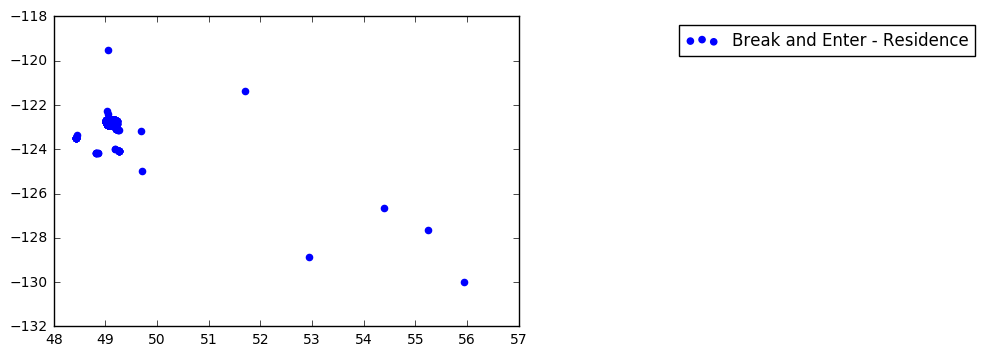

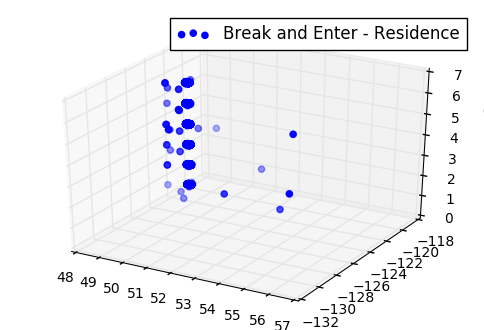

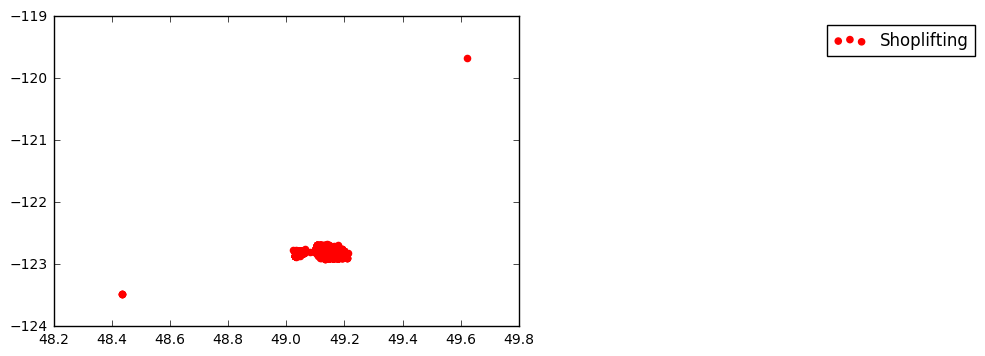

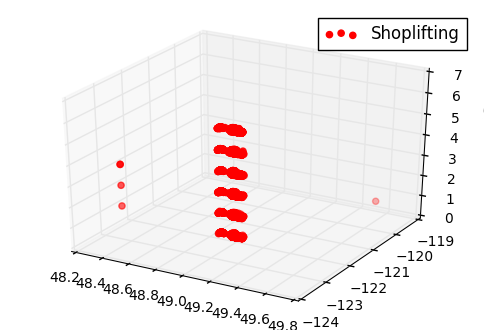

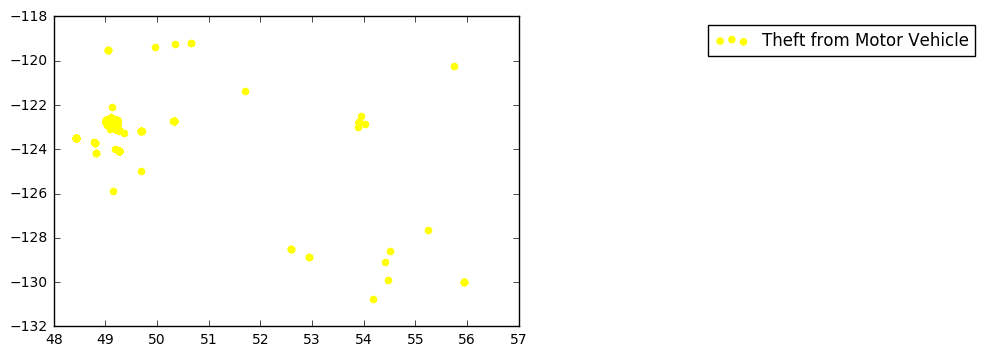

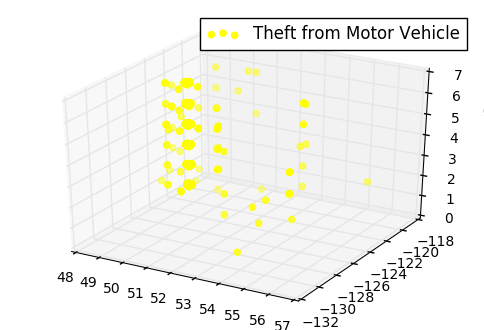

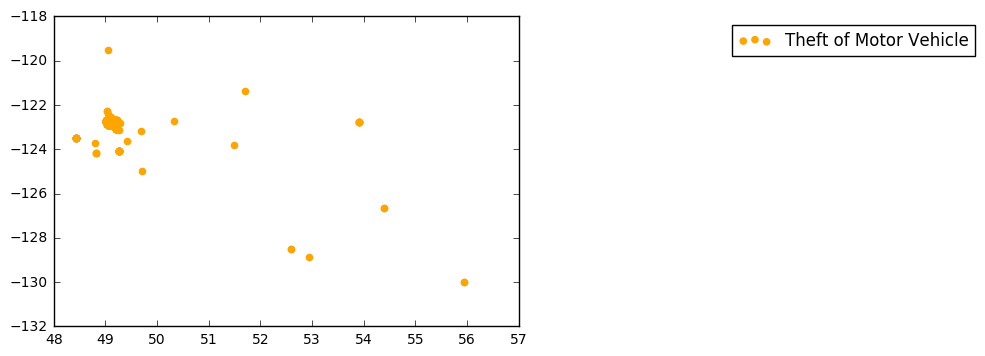

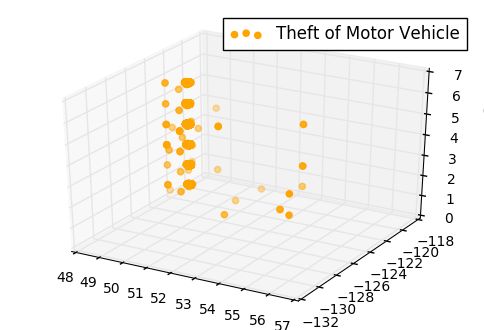

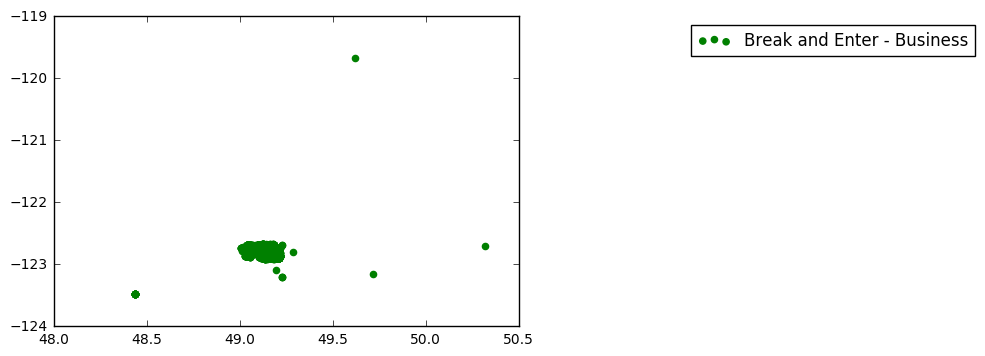

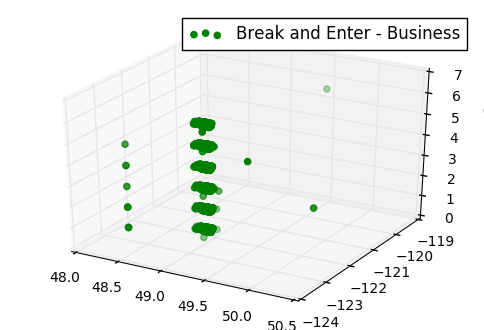

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

incident_types = ['Break and Enter - Residence', 'Shoplifting', 'Theft from Motor Vehicle','Theft of Motor Vehicle', 'Break and Enter - Business']
colors = ['blue', 'red', 'yellow', 'orange', 'green']

for i in range(len(incident_types)):
    incident_type = incident_types[i]
    color = colors[i]
    plot_df = concatenated_dfs[[incident_type, 'HUNDRED_BLOCK_GEOCODED', "YEAR", "MONTH"]][concatenated_dfs[incident_type] >= 1]
    
    

    longitude = plot_df['HUNDRED_BLOCK_GEOCODED'].apply(lambda x: eval(x)[0])
    latitude = plot_df['HUNDRED_BLOCK_GEOCODED'].apply(lambda x: eval(x)[1])
    
    plt.scatter(latitude, longitude, label=incident_type, color=color)
    plt.legend(bbox_to_anchor=(2, 1))
    plt.show()
    
     #time = plot_df["YEAR"] +"-"+ plot_df["MONTH"]
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(latitude.values,longitude.values , plot_df["YEAR"].values, label=incident_type, color=color)
    ax.legend()
    plt.show()
    
    
    #the scatter plots show datapoints where more or equal than 1 of incident type has occured

In [240]:
#interesting!

In [ ]:
#now do some prelimnary plottin to get a idea of if how it seems to change over years

In [35]:
from mpl_toolkits.mplot3d import Axes3D


incident_types = ['Break and Enter - Residence', 'Shoplifting', 'Theft from Motor Vehicle','Theft of Motor Vehicle', 'Break and Enter - Business']
colors = ['blue', 'red', 'yellow', 'orange', 'green']
for i in range(len(incident_types)):
    incident_type = incident_types[i]
    color = colors[i]
    plot_df = concatenated_dfs[[incident_type, 'HUNDRED_BLOCK_GEOCODED', "YEAR", "MONTH"]][concatenated_dfs[incident_type] >= 1]
    
    

    longitude = plot_df['HUNDRED_BLOCK_GEOCODED'].apply(lambda x: eval(x)[0])
    latitude = plot_df['HUNDRED_BLOCK_GEOCODED'].apply(lambda x: eval(x)[1])
    time = plot_df["YEAR"].values +"-" + plot_df["MONTH"].values
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(latitude.values,longitude.values , time, label=incident_type, color=color)
    ax.legend()
    plt.show()
    #the scatter plots show datapoints where more or equal than 1 of incident type has occured

TypeError: ufunc 'add' did not contain a loop with signature matching types dtype('<U32') dtype('<U32') dtype('<U32')

In [ ]:
concatenated_dfs[[incident_type, 'HUNDRED_BLOCK_GEOCODED', "YEAR", "MONTH"]][concatenated_dfs[incident_type] >= 1]